In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

#basic variable creation and printing

x = [5,4,5]
for i in x:
    print (i)
print (x [1:])
print (x [:2])

#creating and printing arrays using numpy

twod = np.array([[1,2], [3,4]])
print(twod [1:, 1])

#basic method creation

def noDefault(a, b, c):
    print (a, b, c)
    return 4
noDefault(66, 77, 88)

def withDefault(a, b, c= 99):
    print (a, b, c)
withDefault(11, 22)

def withMultipleDefault(a, b, c= 99, d=100):
    print (a, b, c, d)
withMultipleDefault(11, 22, d=33)

In [159]:
#using panda to read data from files and 

training_data = pd.read_csv("train.csv")
#visualizing data
print (training_data.head())

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


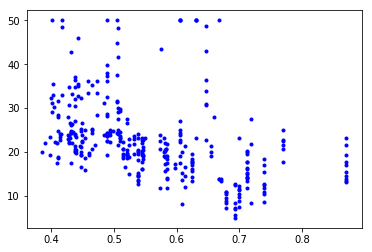

In [200]:
plt.plot(training_data["nox"], training_data["medv"], 'b.')

In [153]:
def normalizing (a):
    maxi = np.max(a)
    mini = np.min(a)
    return (a - mini) / (maxi - mini)

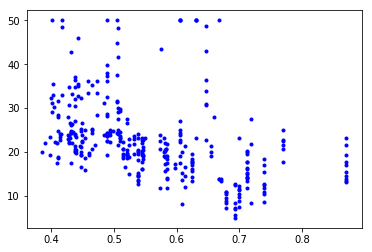

In [226]:
plt.plot(training_data["nox"], training_data["medv"], 'b.')

features = ["lstat", "rm", "ptratio"]
trainX = np.array(training_data[features]).reshape((-1, len(features)))
trainX_orig = trainX
trainX = normalizing(trainX)
constants = np.ones(trainX.shape[0]).reshape((-1, 1))
trainX = np.hstack((trainX, constants))
#reshape turns a list of values into a matrix
trainY = (np.array(training_data["medv"]))

[-32.70059657  11.50562169  -1.61557208  31.76149864]
36.907953821207926


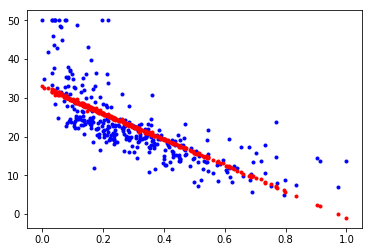

In [227]:
#Gradient dissent alg

#creates matrix with proper collums equal to the number of features plus 1
weights = np.ones(trainX.shape[1])

epochs = 10000
learningRate = 0.01
for i in range(epochs):
    hypothesis = np.matmul(trainX, weights)
    errorish = hypothesis - trainY
    gradients = np.matmul(np.transpose(trainX), errorish) / trainX.shape[0]
    delta = gradients * learningRate
    weights = weights - delta
print (weights)
hypothesis = np.matmul(trainX, weights)
errorish = hypothesis - trainY
error = (np.sum(errorish ** 2) / errorish.shape[0])
print (error)
plt.plot(trainX[:, 0], trainY, 'b.')
plt.plot(trainX[:, 0], hypothesis, 'r.')